In [ ]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"sohinimukherjee06","key":"1074b7ebb6cfa925b8a9e13cfeb6b101"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp 'kaggle (2).json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls ~/.kaggle


kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:18<00:00, 224MB/s]
100% 2.29G/2.29G [00:18<00:00, 130MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
from zipfile import ZipFile
with ZipFile("/content/chest-xray-pneumonia.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
dir='/content/chest_xray'

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from PIL import Image
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator


(1858, 2090)


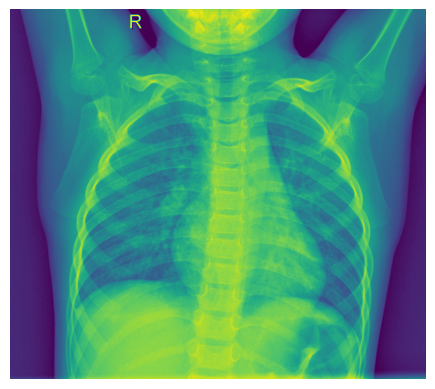

In [ ]:
image_path = '/content/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg'
# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
train_path='/content/chest_xray/chest_xray/train'
test_path='/content/chest_xray/chest_xray/test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (180, 180),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (180, 180),
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(2, activation='softmax')(x)

model_xray = Model(inputs=base_model.input, outputs=x)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model_xray.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_xray.fit(
    train_datagen.flow_from_directory(train_path, target_size=(180, 180), batch_size=32, class_mode='categorical'),
    steps_per_epoch=len(train_datagen.flow_from_directory(train_path, target_size=(180, 180), batch_size=32, class_mode='categorical')) // 32,
    epochs=100,
    validation_data=test_datagen.flow_from_directory(test_path, target_size=(180, 180), batch_size=32, class_mode='categorical'),
    validation_steps=len(test_datagen.flow_from_directory(test_path, target_size=(180, 180), batch_size=32, class_mode='categorical')) // 32,
)

In [ ]:
loss, accuracy = model_xray.evaluate(test_set)
print('Test accuracy:', accuracy)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the path to the image you want to predict
img_path = '/content/chest_xray/test/PNEUMONIA/person100_bacteria_479.jpeg'

# Load the image and resize it
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

# Make the prediction
prediction = model_xray.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(prediction)

# Print the predicted class
print('Predicted class:', predicted_class)

# Get the class labels from the training set
class_labels = training_set.class_indices

# Invert the dictionary to get the class name from the index
inverted_class_labels = {v: k for k, v in class_labels.items()}

# Print the predicted class name
print('Predicted class name:', inverted_class_labels[predicted_class])


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model_xray.save('model_xray.h5')